<a href="https://colab.research.google.com/github/pratikasarkar/Supervised-Learning---Classification/blob/master/Classification_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Univariate Analysis

In [0]:
df = pd.DataFrame({'bmi' : [4.5,5.8,6.5,7.0,5.0,6.0,8.6],
                'glucose' :[190,220,280,320,200,250,380]})

In [0]:
df

,bmi,glucose
0,4.5,190
1,5.8,220
2,6.5,280
3,7.0,320
4,5.0,200
5,6.0,250
6,8.6,380


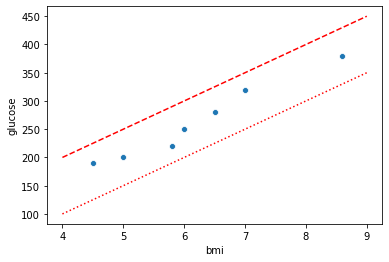

In [0]:
sns.scatterplot(df['bmi'],df['glucose'])
plt.plot([4,9],[200,450],color = 'r',linestyle = 'dashed')
plt.plot([4,9],[100,350],color = 'r',linestyle = 'dotted')

glucose = beta0 + beta1 * bmi

y -> actual points 

y' -> predicted points on the line

residual = y - y'

The difference between actual(y) and the predicted(y') is called a residual

For dashed line, all residuals will be negative.

For dotted line, all residuals will be positive.

beta1 = covariance of X and y divided by variance of X

beta1 = cov(X,y)/var(X)

cov(X,y) = sum_1_to_n((X-Xbar)(y-ybar))/n-1

var(X) = sum_1_to_n((X-Xbar)**2)/n-1

beta0 = ybar - beta1 * Xbar

In [0]:
n_bmi = len(df['bmi'])
n_glucose = len(df['glucose'])

In [0]:
cov_bmi_glu = np.sum((df['bmi'] - np.mean(df['bmi']))*(df['glucose'] - np.mean(df['glucose'])))/(n_bmi-1)

In [0]:
var_bmi = np.sum((df['bmi'] - np.mean(df['bmi']))**2)/(n_bmi-1)

In [0]:
beta1 = cov_bmi_glu/var_bmi

In [0]:
beta1

50.00000000000001

In [0]:
ybar = np.mean(df['glucose'])
Xbar = np.mean(df['bmi'])

In [0]:
beta0 = ybar - beta1 * Xbar

In [0]:
beta0

-47.142857142857224

In [0]:
glu_predict = beta0 + beta1 * df['bmi']

In [0]:
glu_predict

0    177.857143
1    242.857143
2    277.857143
3    302.857143
4    202.857143
5    252.857143
6    382.857143
Name: bmi, dtype: float64

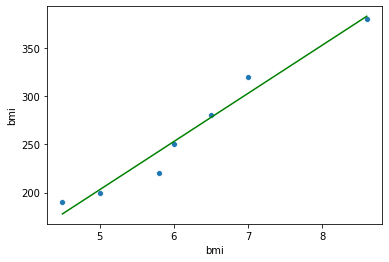

In [0]:
sns.scatterplot(df['bmi'],df['glucose'])
sns.lineplot(df['bmi'],glu_predict,color = 'g')

### Verification using the sklearn model

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [0]:
lr.fit(df[['bmi']],df['glucose'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lr.coef_

array([50.])

In [0]:
lr.intercept_

-47.14285714285728

In [0]:
lr.predict(df[['bmi']])

array([177.85714286, 242.85714286, 277.85714286, 302.85714286,
       202.85714286, 252.85714286, 382.85714286])

For feature selection, correlation matrix will just give us how strongly the variables are correlated with each other, but the final decision whether to keep a variable or drop a variable should be taken by p-value in the ols summary.

For Regreesion model, we calculate the measures like rmse, r-squared and adjusted rsquared.

For binary classification, we calculate accuracy,confusion matrix,classification report and ROC AUC curve.

For multiclass classification, we calculate accuracy,confusion matrix,classification report and f1-score.

##### We will be working on differnt models for regression and classification, but we need to choose the best model for our clients. 

##### So for final performance validation, for regression we use RMSE.

##### For binary classification we use AUC and for multiclass classification we use F1-SCORE

# Adding a categorical value for y (dependent variable)

In [0]:
df['outcome'] = [0,0,1,1,0,0,1]

In [0]:
df

,bmi,glucose,outcome
0,4.5,190,0
1,5.8,220,0
2,6.5,280,1
3,7.0,320,1
4,5.0,200,0
5,6.0,250,0
6,8.6,380,1


In [0]:
n_outcome = len(df['outcome'])

In [0]:
cov_bmi_outcome = np.sum((df['bmi'] - np.mean(df['bmi']))*(df['outcome'] - np.mean(df['outcome'])))/(n_bmi-1)

In [0]:
beta1 = cov_bmi_outcome/var_bmi

In [0]:
beta1

0.3176043557168785

In [0]:
ybar = np.mean(df['outcome'])
Xbar = np.mean(df['bmi'])

In [0]:
beta0 = ybar - beta1 * Xbar

In [0]:
beta0

-1.540575576873218

In [0]:
outcome_predict = beta0 + beta1 * df['bmi']

In [0]:
outcome_predict

0   -0.111356
1    0.301530
2    0.523853
3    0.682655
4    0.047446
5    0.365051
6    1.190822
Name: bmi, dtype: float64

## Squashing / Sigmoid / Logistic function

#### y = 1 / ( 1 + e^-(beta0 + beta1 * X) )

![alt text](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [0]:
outcome_pred_prob = 1/(1+ np.exp(-outcome_predict))
outcome_pred_prob

0    0.472190
1    0.574816
2    0.628048
3    0.664331
4    0.511859
5    0.590262
6    0.766888
Name: bmi, dtype: float64

In [0]:
outcome_pred = []
for val in outcome_pred_prob:
    if val > np.mean(outcome_pred_prob):
        outcome_pred.append(1)
    else:
        outcome_pred.append(0)
outcome_pred

[0, 0, 1, 1, 0, 0, 1]

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/US_Heart_Patients.csv')

In [0]:
df.shape

(4240, 16)

In [0]:
import statsmodels.api as sm

In [0]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [0]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
df2 = df.dropna()

In [0]:
df.shape[0] - df2.shape[0]

582

In [0]:
df2.rename(columns={'male':'Gender'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


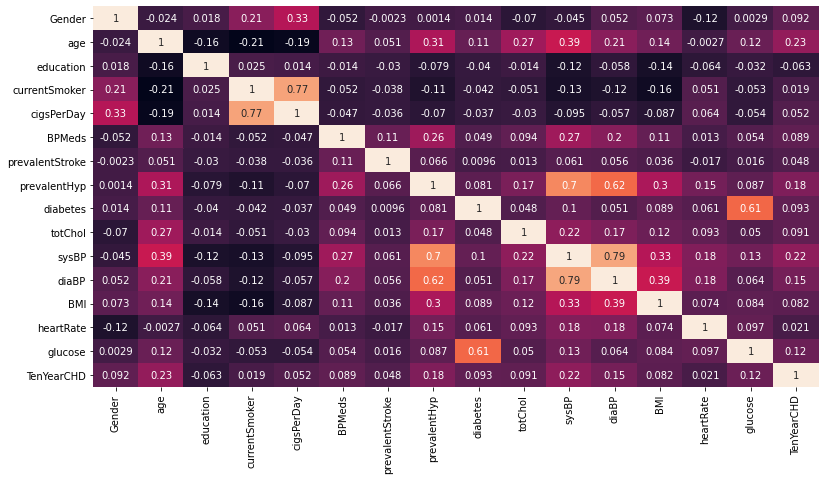

In [0]:
plt.figure(figsize=(13,7))
sns.heatmap(df2.corr(),annot = True,cbar=False)

In [0]:
X = df2.drop('TenYearCHD',axis=1)

In [0]:
X.shape

(3658, 15)

In [0]:
y = df2['TenYearCHD']

In [0]:
Xc = sm.add_constant(X)

In [0]:
model = sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.1175
Time:                        13:13:32   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
Gender              0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

In [0]:
def backward_elimination(df,target):
  X = df.drop(target,axis =1)
  Xc = sm.add_constant(X)
  remaining_cols = list(Xc.columns)
  y = df[target]
  while len(remaining_cols) > 0 : 
    X_temp = Xc[remaining_cols]
    model = sm.Logit(y,X_temp).fit()
    pvals = list(model.pvalues)
    max_pval = max(pvals)
    max_pval_feature = model.pvalues.idxmax()
    if max_pval > 0.03:
      remaining_cols.remove(max_pval_feature)
      print(max_pval_feature,max_pval)
    else:
      break
  return remaining_cols

In [0]:
impt_features = backward_elimination(df2,'TenYearCHD')

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7
diabetes 0.9012045780435511
Optimization terminated successfully.
         Current function value: 0.376502
         Iterations 7
currentSmoker 0.64836503909236
Optimization terminated successfully.
         Current function value: 0.376531
         Iterations 7
BMI 0.6296050439469527
Optimization terminated successfully.
         Current function value: 0.376562
         Iterations 7
diaBP 0.5625804781393751
Optimization terminated successfully.
         Current function value: 0.376608
         Iterations 7
BPMeds 0.4697715086532108
Optimization terminated successfully.
         Current function value: 0.376679
         Iterations 7
heartRate 0.41602841295529747
Optimization terminated successfully.
         Current function value: 0.376770
         Iterations 7
education 0.3066346175601081
Optimization terminated successfully.
         Current function value: 0.376914
         Itera

In [0]:
impt_features

['const', 'Gender', 'age', 'cigsPerDay', 'sysBP', 'glucose']

In [0]:
model = sm.Logit(y,Xc[impt_features]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378192
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3652
Method:                           MLE   Df Model:                            5
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.1135
Time:                        13:24:23   Log-Likelihood:                -1383.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.041e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7081      0.421    -20.682      0.000      -9.533      -7.883
Gender         0.5312      0.106      5.032      0.000       0.324       0.738
age            0.0674      0.006     10.574      0.000       0.055       0.080
cigsPerDay     0.0195      0.004      4.683      0.000       0.011       0.028
sysBP          0.0180      0.002      8.413      0.000       0.014       0.022
glucose        0.0073      0.002      4.369      0.000       0.004       0.011
==============================================================================
"""

# Confusion Matrix
For a confusion matrix, the abonormility is considered as positive case and the opposite to abnormality is considered as negative case.

![alt text](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

# Pseudo R-square (Used Rarely)

![alt text](https://thestatsgeek.com/wp-content/ql-cache/quicklatex.com-5131a3908febd4a52f24c502dd3a83c4_l3.svg)

Numerator : Log of Likelihood  when all the features are taken into consideration

Denominator : Log of Likelihood  when none of the features are taken into consideration. (The null model will classify all the records to the class with higher probability)

So according to our model : 

Pseudo R-square =  1 - [ (-1381.4)/(-1560.6) ] = 0.1148

MAXIMUM VALUE OF PSEUDO R_SQUARE IS AROUND 0.4

In [0]:
impt_features.remove('const')

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X[impt_features],y,test_size = 0.3,random_state = 0)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy * 100)
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

84.15300546448088
[[907   9]
 [165  17]]


### Confusion Matrix :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***Actual***

***Predicted*** [ TN &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; FP/alpha/type1 error

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FN/beta/type2 error &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; TP]



*   Alpha/ Type1 Error/ False Positive rate = FP/FP+TN
*   Beta/ Type2 Error/ False Negative Rate = FN/FN+TP
*   1- Alpha/ True Negative Rate/ Specificity = TN/TN+FP
*   1- Beta/ True Positive Rate/ Sensitivity/Recall = TP/TP+FN

In [0]:
print('TPR/Sensitivity/Recall : ',17/182)
print('Using metrics : ',metrics.recall_score(y_test,y_pred))

TPR/Sensitivity/Recall :  0.09340659340659341
Using metrics :  0.09340659340659341


In [0]:
print('TNR/Specificity : ',907/916)

TNR/Specificity :  0.990174672489083


In [0]:
model.coef_

array([[0.5213538 , 0.05738011, 0.01798024, 0.01886123, 0.00915603]])